In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [57]:
# Importing the data / Leitura dos dados

url_gym_churn_log = 'https://raw.githubusercontent.com/RafaelGenari/Bootcamp-Project-Gym-Model-Fitness/refs/heads/main/gym_churn_us.csv'

gym_churn_log = pd.read_csv(url_gym_churn_log, sep = ',')

In [58]:
# Análise exploratória dos dados / Exploratory Data Analysis (EDA)
gym_churn_log.info()
gym_churn_log.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [59]:
# Verificar valores ausentes / Checking for missing values
gym_churn_log.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

A base de dados contém 4.000 registros e 14 colunas, sem valores ausentes.

As variáveis incluem informações sobre idade, gastos, frequência de aulas e características dos clientes.

A maioria dos clientes tem entre 27 e 31 anos, mora perto da academia (84.5%) e possui contratos de curto prazo (1 mês). Apenas 41.2% participam de treinos em grupo, e 48.7% fazem parte de parcerias corporativas. O gasto médio com serviços adicionais é de 146,94, mas varia bastante, chegando a mais de 500 em casos extremos.

A frequência média de aulas é 1.88 por semana, com clientes mais ativos apresentando menor risco de cancelamento. O churn é de 26.5%, sendo maior entre clientes com contratos curtos e baixa frequência.

Em resumo, clientes que frequentam menos e possuem contratos curtos são mais propensos a cancelar.

In [60]:
# Comparação entre clientes que ficaram e que saíram / Comparing retained and churned customers
gym_churn_log.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<Figure size 1200x600 with 0 Axes>

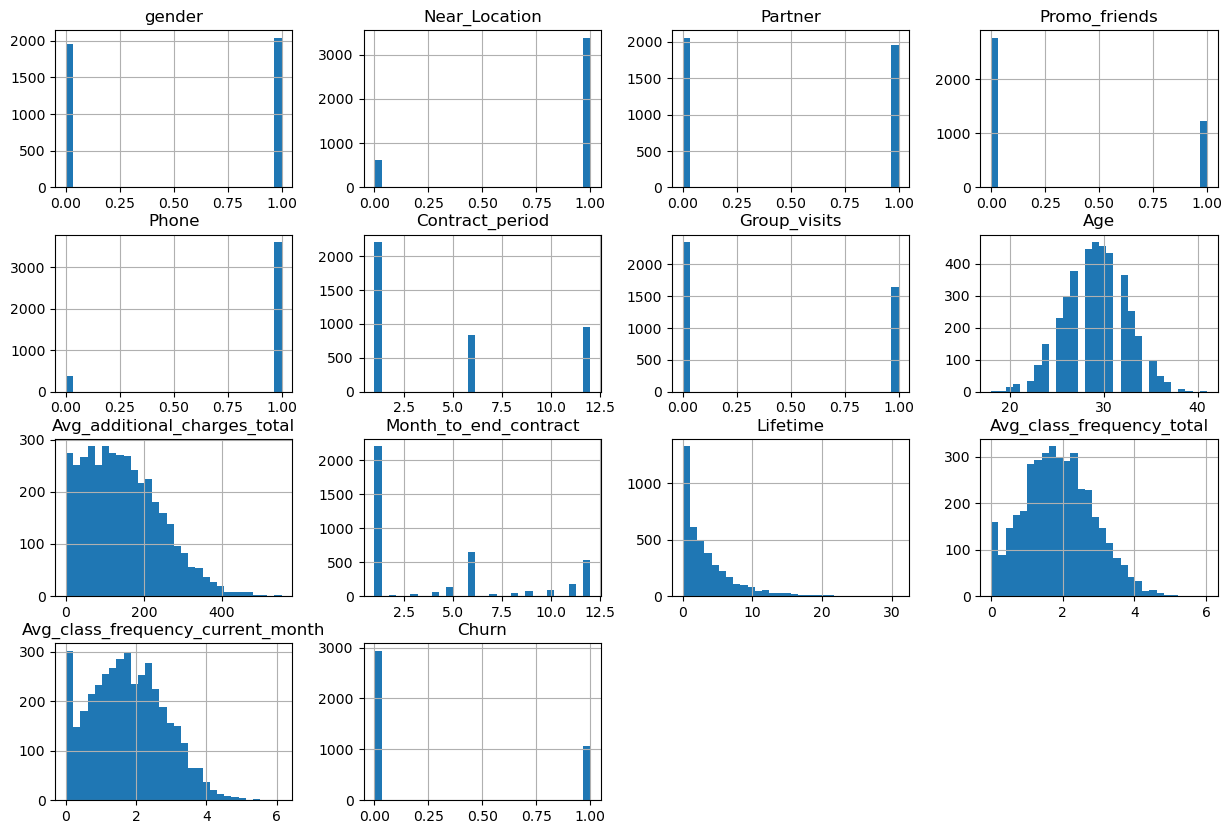

In [61]:
# Visualização da distribuição das variáveis / Visualizing variable distributions
plt.figure(figsize=(12, 6))
gym_churn_log.hist(bins=30, figsize=(15, 10))
plt.show()

Os histogramas revela a distribuição das variáveis do conjunto de dados.

- A maioria dos clientes possui contratos de curta duração, geralmente de 1 ou 6 meses.
- A faixa etária predominante está entre 18 e 41 anos, com um pico de concentração entre 27 e 31 anos.
- A frequência média de participação nas aulas e os gastos adicionais apresentam distribuições assimétricas, indicando que a maioria dos clientes gasta pouco e frequenta poucas aulas.
- A variável Lifetime mostra que a permanência dos clientes na academia tende a ser curta, o que pode estar associado à taxa de cancelamento (Churn).
- Observa-se também que o número de clientes que utilizam telefone, frequentam em grupo ou participam de promoções é relativamente baixo em comparação com os demais grupos.

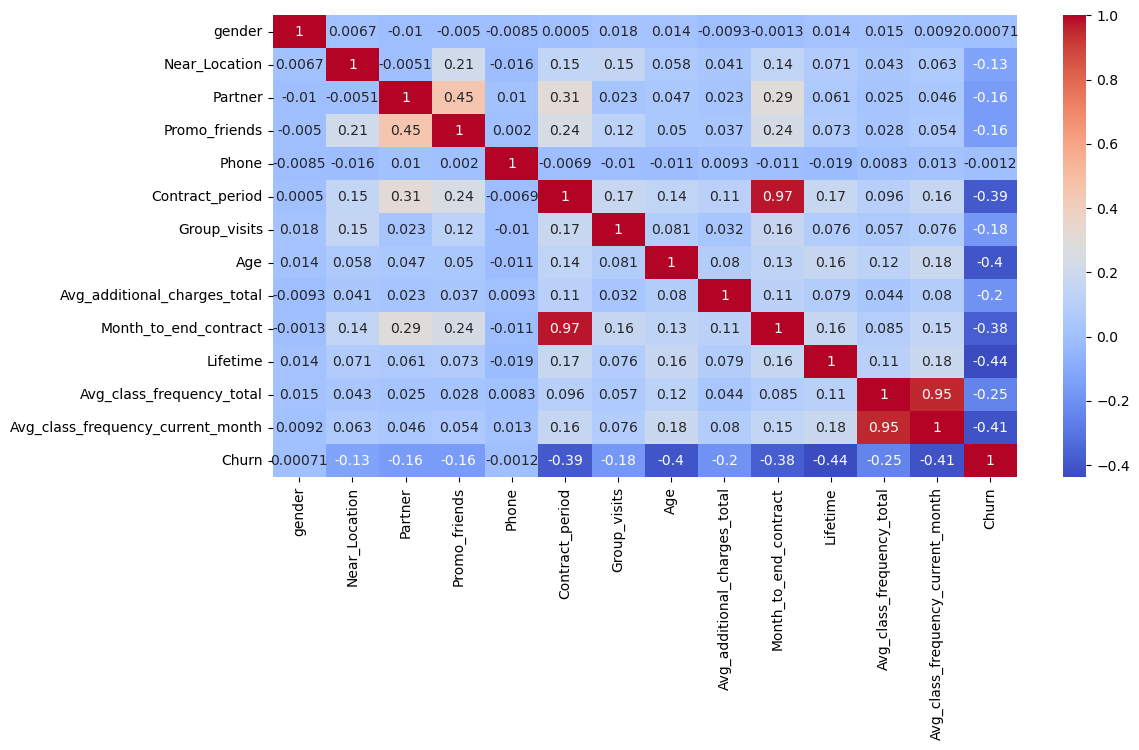

In [62]:
# Matriz de correlação / Correlation Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(gym_churn_log.corr(), annot=True, cmap='coolwarm')
plt.show()

A matriz de correlação destaca relações importantes entre as variáveis do conjunto de dados.

- A taxa de cancelamento (Churn) apresenta correlação negativa moderada com a duração do contrato (Contract_period), o tempo de permanência (Lifetime) e a frequência média de aulas, indicando que clientes com contratos mais longos, maior tempo na academia e maior participação nas aulas tendem a permanecer ativos.
- A proximidade da academia (Near_Location) e a recomendação de amigos (Promo_friends) também estão negativamente correlacionadas com o Churn, sugerindo que clientes que moram perto e ingressam por indicação têm menor propensão a cancelar a matrícula.
- Observa-se ainda uma alta correlação entre Lifetime, Avg_class_frequency_total e Avg_class_frequency_current_month, o que é esperado, pois clientes que permanecem mais tempo na academia tendem a frequentá-la com maior regularidade.

In [63]:
# Separar variáveis independentes e alvo / Splitting independent variables and target
y = gym_churn_log['Churn']
X = gym_churn_log.drop(columns=['Churn'])

In [64]:
# Dividir em conjunto de treino e teste / Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Padronizar os dados / Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
# Treinar modelos de Machine Learning / Training Machine Learning models
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [67]:
# Avaliar os modelos / Evaluating the models
def evaluate_model(model_name, y_test, y_pred):
    print(f"{model_name} - Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"{model_name} - Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"{model_name} - Recall: {recall_score(y_test, y_pred):.2f}\n")

evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)

Logistic Regression - Accuracy: 0.92
Logistic Regression - Precision: 0.87
Logistic Regression - Recall: 0.78

Random Forest - Accuracy: 0.91
Random Forest - Precision: 0.85
Random Forest - Recall: 0.78



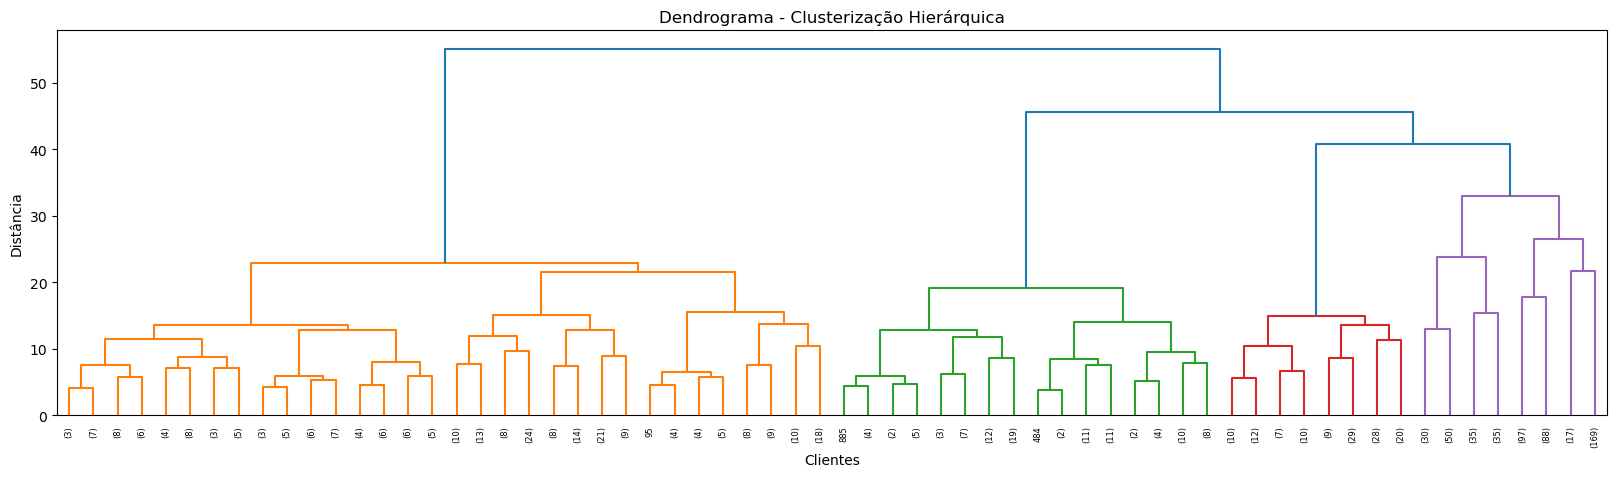

In [90]:
# Clusterização de clientes / Customer Clustering
# Reduzindo a amostra para evitar sobrecarga na visualização / Reducing sample size for dendrogram visualization
sample_size = min(1000, X_train_scaled.shape[0])  # Limitar a 1000 amostras
X_sample = X_train_scaled[:sample_size]

linked = linkage(X_sample, method='ward')
plt.figure(figsize=(20, 5))
dendrogram(linked, truncate_mode='level', p=5)  # Mostra apenas os 5 primeiros níveis
plt.title("Dendrograma - Clusterização Hierárquica")
plt.xlabel("Clientes")
plt.ylabel("Distância")
plt.show()


In [81]:
# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
gym_churn_log['Cluster'] = kmeans.fit_predict(scaler.transform(gym_churn_log.drop(columns=['Churn'])))  # Ajuste para incluir todo o dataset


In [83]:
# Análise dos clusters / Cluster Analysis
gym_churn_log.groupby('Cluster').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.487701,0.718405,0.359627,0.150975,0.909245,1.692112,0.000000,28.030534,129.847080,1.620017,2.206955,1.319946,1.062433,0.594572
1,0.535245,0.853047,0.360812,0.194743,0.902031,2.243728,0.323775,30.268817,158.428563,2.149343,5.240143,2.865477,2.865916,0.056153
2,0.572108,0.947702,0.808241,0.602219,0.879556,10.085578,0.522979,29.849445,161.694862,9.231379,4.733756,1.115982,1.097139,0.055468
3,0.503608,0.871573,0.317460,0.222222,0.907648,2.005772,1.000000,28.526696,137.051461,1.913420,2.747475,1.464784,1.276947,0.383838
4,0.466667,0.936364,0.743939,0.543939,0.913636,10.754545,0.537879,29.924242,159.203601,9.743939,4.575758,2.791179,2.787284,0.018182


In [84]:
# Taxa de rotatividade por cluster / Churn rate per cluster
gym_churn_log.groupby('Cluster')['Churn'].mean()

Cluster
0    0.594572
1    0.056153
2    0.055468
3    0.383838
4    0.018182
Name: Churn, dtype: float64

#### Conclusão

A análise exploratória dos dados revelou padrões relevantes no comportamento dos clientes da academia Model Fitness. Algumas variáveis categóricas, como participação em programas de parceria, proximidade da academia e recomendações de amigos, apresentaram distribuições assimétricas, indicando que a maioria dos clientes se concentra em uma única categoria. Já variáveis contínuas, como idade, frequência média de treinos e tempo de permanência na academia, demonstraram maior variabilidade, refletindo diferenças significativas entre os perfis dos clientes.

Um aspecto crítico identificado foi o desbalanceamento da variável Churn, evidenciado pela predominância de clientes que permaneceram na academia em comparação àqueles que cancelaram a assinatura. Esse desnível pode comprometer a modelagem preditiva, exigindo estratégias específicas, como técnicas de balanceamento de classes ou ajustes nos pesos dos modelos, para minimizar impactos na precisão das previsões.

Para prever a rotatividade dos clientes, foram aplicados os algoritmos de Regressão Logística e Random Forest, ambos apresentando desempenho satisfatório. No entanto, para aprimorar ainda mais a acurácia das previsões, recomenda-se a adoção de técnicas avançadas, como engenharia de variáveis, otimização de hiperparâmetros e validação cruzada.

Além da modelagem preditiva, a segmentação dos clientes por meio de algoritmos de clusterização, como K-Means e Clusterização Hierárquica, permitiu identificar diferentes perfis de usuários. Essa abordagem viabiliza a criação de estratégias de retenção mais direcionadas, voltadas para os grupos com maior propensão ao cancelamento.

Com base nas análises realizadas, foram formuladas as seguintes recomendações para a academia:

- Aprimoramento das estratégias de retenção: Desenvolvimento de programas personalizados para perfis de clientes com maior risco de cancelamento, incluindo incentivos para frequência contínua e experiências customizadas.

- Monitoramento ativo do engajamento: Implementação de um sistema de acompanhamento da frequência de treinos, permitindo a identificação precoce de quedas no envolvimento dos clientes.

- Otimização da aquisição de clientes: Revisão das campanhas promocionais e parcerias existentes para assegurar que estejam atraindo um público com maior taxa de retenção.

- Aprofundamento da modelagem preditiva: Exploração de técnicas mais avançadas, como XGBoost e Redes Neurais, além da aplicação de métodos de balanceamento de classes para aumentar a eficácia das previsões.

A implementação dessas medidas pode contribuir significativamente para a redução da taxa de cancelamento, otimizando a retenção de clientes e aumentando o valor agregado ao longo do tempo.